In [18]:
from time import time
import logging
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import cv2

# !pip install -U scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

Total dataset size:
n_samples: 1288
image shape =  50 , 37
n_features = h*w : 1850
n_classes: 7
Classes: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


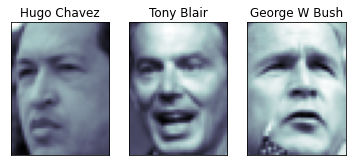

In [19]:
#Download the data
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

#Find out shape infomration about the images to help with plotting them
n_samples, h, w = lfw_people.images.shape

"""
print (n_samples)
print (h)
print (w)
"""

# image shape is 50x37 pixels

np.random.seed(42)


# for machine learning we use the data directly (as relative pixel
# position info is ignored by this model) i.e., all the pixel intensities = 50*37 = 1850 # of features
X = lfw_people.data
n_features = X.shape[1]



# the label to predict is the ID of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]



print ("Total dataset size:")
print ("n_samples: %d" % n_samples)
print ("image shape = ",h,",", w)
print ("n_features = h*w : %d" % n_features)
print ("n_classes: %d" % n_classes)
print ("Classes: %s" % target_names)



#Lets look at the data to see what they look like

pl.figure
for i in range(0,3):
  pl.subplot(1,3,i+1)
  pl.imshow(X[i].reshape((h,w)), cmap=pl.cm.bone)
  pl.title(target_names[lfw_people.target[i]])
  pl.xticks(())
  pl.yticks(())



In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

Extracting the top 250 eignefaces from 966 faces


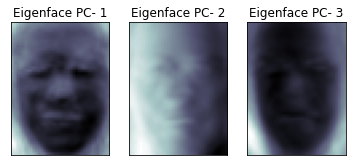

In [21]:
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 250

print("Extracting the top %d eignefaces from %d faces" % (n_components, X_train.shape[0]))


# Here we take compute the PCs. Using the PCA function from sklearn. 
# We should use train data to compute PCA
pca=PCA(n_components=n_components, whiten = True).fit(X_train)



#Reshape the PCs to the image format
eigenfaces = pca.components_.reshape((n_components,h,w))


pl.figure
for i in range(0,3):
  pl.subplot(1,3,i+1)
  pl.imshow(eigenfaces[i], cmap=pl.cm.bone)
  pl.title("Eigenface PC- %d" % (i+1))
  pl.xticks(())
  pl.yticks(())



 The total variance in % captured using top 21 components is 
75.77634453773499


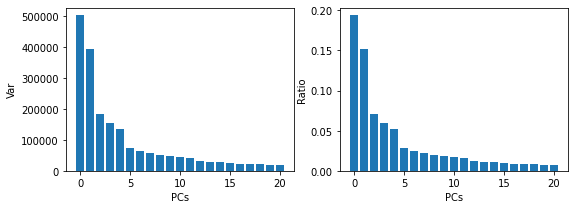

In [22]:
# Here we're going to plot the top PCs identified

top_pcs = 21
plt.figure( figsize = (9, 3))
plt.subplot(121)
plt.bar(np.arange(top_pcs),pca.explained_variance_[0:top_pcs])
plt.xlabel('PCs')
plt.ylabel('Var')


plt.subplot(122)
plt.bar(np.arange(top_pcs),pca.explained_variance_ratio_[0:top_pcs])
plt.xlabel('PCs')
plt.ylabel('Ratio')


np.shape(pca.explained_variance_)


# Calculate the total variance captured  by the top 21 PC components
print(" The total variance in % captured using top 21 components is ")
print(np.sum(pca.explained_variance_ratio_[0:top_pcs])*100)



Projecting the input data on the eignefaces orthonormal basis


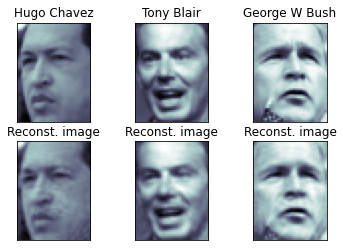

In [23]:
print("Projecting the input data on the eignefaces orthonormal basis")




pl.figure
for i in range(0,3):
  pl.subplot(2,3,i+1)
  pl.imshow(X[i].reshape((h,w)), cmap=pl.cm.bone)
  pl.title(target_names[lfw_people.target[i]])
  pl.xticks(())
  pl.yticks(())


  # reconstruct the 3 images using the top 21 eigen faces
  pl.subplot(2,3,i+4)
  temp = X[i]
  temp = np.reshape(temp, (1, temp.shape[0]))
  X_PCA = pca.transform(temp)
  X_projected = pca.inverse_transform(X_PCA)
  pl.imshow(X_projected.reshape((h,w)), cmap=pl.cm.bone)
  pl.title("Reconst. image")
  pl.xticks(())
  pl.yticks(())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


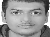

([], <a list of 0 Text major ticklabel objects>)

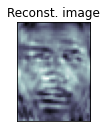

In [24]:
# Take your own image, resize it to 50x37, and create one array
import cv2
from google.colab.patches import cv2_imshow 

from google.colab import drive 
drive.mount('/content/drive')
# Obtain the PCA projection of your photo on the top 20 PCA components

pl.figure

pl.subplot(2,1,1)
# put the path of your face image (no hairs, only face) in the below blank space
# img = cv2.imread('______________________________', 0)

img = cv2.imread('/content/drive/MyDrive/sem6/mlscv/casestudy3/abhishek.jpg', 0)


img_resize = cv2.resize(img, (50, 37), interpolation = cv2.INTER_NEAREST)
cv2_imshow(img_resize)


img_vector_stretched = img_resize.reshape(1, 1850)
# X_PCA = _________________________________

X_PCA = pca.transform (img_vector_stretched)   # X is projected on the first principal components previously extracted from a training set.


# X_projected = ____________________________

X_projected = pca.inverse_transform(X_PCA)     # Transform data back to its original space.
                                               # In other words, return an input X_original whose transform would be X.


pl.figure
pl.imshow(X_projected.reshape((h,w)), cmap=pl.cm.bone)
pl.title("Reconst. image")
pl.xticks(())
pl.yticks(())



# Questions to be answered:


## Fill the blank spaces in the last cell to projecct your image on the PCA components (5 M)
DONE

## 1. What is your understanding of the assignment in 4 -5 sentencces? (2 M)


*   In this assignment, we have used PCA for the Labeled Faces in the Wild (LFW) dataset for face recognition.
*   We read all the different image attributes and split the data set in the training (75%) and testing sets (25%).


*   We are extracting the top 250 eigenfaces/principal components (PC) from 966 faces of the training set, and plotting them.

*   After getting all the PCs, we are checking which region of PCs has more concentration of variance by plotting the graph of PCs vs Variance. We found that the top 21 PCs have captured the 75% of the total variance.
*   We are projecting the input data on the eigenfaces orthonormal basis to reduce the dimensions of the input data. The same process is repeated for taking my picture and then projecting it on the 21 PCs.
<br>

RotationOfCoordinates.svg





## 2. Explain your observations on eigenfaces images shown above in 2 sentences (1 M)

An eigenface is a set of eigenvectors used in the computer vision problem of human face recognition. The eigenfaces themselves form a basis set of all images used to construct the covariance matrix, producing dimension reduction by allowing the smaller set of basis images to represent the original training images. 


## 3. Explain your observations on the reconstructed images above in 2 sentences (1 M)

The reconstructed images have fewer dimensions in comparison to the original images but contain 75% of the variance of the original images. Hence they are less clear in comparison to the original images but contain all the variances in them.

reconstructed images = [eigenfaces orthonormal basis]* original images


## 4. Explain your observations on the reconstructed image of your face in 2 sentences (1 M)

My reconstructed image is much less clear in comparison to my original image. But had tried to concentrate most of the variances in it with fewer dimensions, that’s why we can see some of the facial features like eyes, nose, and lips.
